# 패스트캠퍼스 검색광고 데이터 분석
<br>

## 분석목표 : 
1. 중점관리 키워드, 저효율 키워드 추출
2. 중점관리 광고그룹, 저효율 광고그룹 추출

## 분석과정 : 
1. 데이터 전처리
2. 데이터 탐색
3. 시각화
4. 데이터분석

### 1. 데이터 전처리
- 학습목표 : 
 1. read_excel함수를 사용하여 파이썬에 데이터 불러오기 
 2. 데이터프레임의 열 단위 수치연산 및 데이터 타입 다루기

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Series

import matplotlib.pyplot as plt

In [2]:
# matplotlib 한글 폰트 출력코드
# 출처 : 데이터공방( https://kiddwannabe.blog.me)

import matplotlib
from matplotlib import font_manager, rc
import platform

try : 
    if platform.system() == 'Windows':    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:                                 # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   

In [3]:
df = pd.read_excel('data/naver_rep.xlsx', skiprows=[0])
df

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903
...,...,...,...,...,...,...,...
1376,올인원 패키지 : 업무자동화_3. 엑셀,엑셀셀서식,24016,0.0,0.000000,0.000000,0
1377,올인원 패키지 : 업무자동화_3. 엑셀,MATCH,32287,0.0,0.000000,0.000000,0
1378,마케팅KPI수립,LTV,32602,0.0,0.000000,0.000000,0
1379,data_camp_rmp_8,DECISION,60844,0.0,0.000000,0.000000,0


In [4]:
# 여러 행 제거
df2 = pd.read_excel('data/naver_rep.xlsx', skiprows=[0,2,4])
df2.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
1,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
2,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903
3,6. 파이썬,파이썬,384522,260.4,0.067720,3705.360983,964876
4,1. 코딩,코딩,562162,271.2,0.048242,3243.215339,879560


### # 결측치 확인

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1381 entries, 0 to 1380
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   광고그룹             1381 non-null   object 
 1   키워드              1381 non-null   object 
 2   노출수              1381 non-null   int64  
 3   클릭수              1381 non-null   float64
 4   클릭률(%)           1381 non-null   float64
 5   평균클릭비용(VAT포함,원)  1381 non-null   float64
 6   총비용(VAT포함,원)     1381 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 75.6+ KB


In [6]:
df.isnull().sum()

광고그룹               0
키워드                0
노출수                0
클릭수                0
클릭률(%)             0
평균클릭비용(VAT포함,원)    0
총비용(VAT포함,원)       0
dtype: int64

### # 데이터프레임의 열 단위 수치연산 및 데이터 타입 다루기
- 클릭수(반올림처리, 일의 자리수로 변경)
- 클릭률
- 평균클릭비용(VAT포함,원)

- 클릭수 : 한 번의 클릭이 총 몇 번 이루어졌는지 나타내는 지표<br>
=> 반올림처리, 일의 자리수로 변경 (float to int)

In [7]:
clk = round(df['클릭수'], 0)
clk.astype(int)

0       9606
1       8058
2        324
3       1864
4        814
        ... 
1376       0
1377       0
1378       0
1379       0
1380       0
Name: 클릭수, Length: 1381, dtype: int32

In [8]:
df['클릭수'] = clk.astype(int)
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268489,630.593475,1175174
4,3. html,HTML,9626374,814,0.008452,1408.435349,1145903


- 클릭률 : CTR = 클릭수 / 노출수 * 100<br>
=> 클릭수가 변경되어 기존 클릭률(%) 열 데이터 변경필요

In [9]:
# 클릭률(CTR, click through rate)
df['클릭률(%)'] = round(df['클릭수']/df['노출수']*100, 2)
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.41,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.05,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.03,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.27,630.593475,1175174
4,3. html,HTML,9626374,814,0.01,1408.435349,1145903


- 평균클릭비용 : 칼럼명에 원 단위로 명시됨<br>
 => 반올림처리, 일의 자리수로 변경

In [10]:
# 평균클릭비용(CPC, cost per click)
cpc = round(df['평균클릭비용(VAT포함,원)'], 0)
df['평균클릭비용(VAT포함,원)'] = cpc.astype(int)
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.41,262,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.05,296,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.03,4842,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.27,631,1175174
4,3. html,HTML,9626374,814,0.01,1408,1145903


### # 데이터 탐색 실습

In [11]:
df.tail()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
1376,올인원 패키지 : 업무자동화_3. 엑셀,엑셀셀서식,24016,0,0.0,0,0
1377,올인원 패키지 : 업무자동화_3. 엑셀,MATCH,32287,0,0.0,0,0
1378,마케팅KPI수립,LTV,32602,0,0.0,0,0
1379,data_camp_rmp_8,DECISION,60844,0,0.0,0,0
1380,4. 웹의 동작,REST,61193,0,0.0,0,0


In [12]:
df.shape

(1381, 7)

In [13]:
# describe() - 각 열에 대한 기술통계량
# 데이터의 수, 평균, 표준편차, 최소값, 1사분위수, 2사분위수, 3사분위수, 최대값
# 지수 표기법(Exponential Notation, 10**n)

df.describe()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
count,1.381000e+03,1381.000000,1381.000000,1381.000000,1.381000e+03
mean,3.505415e+04,52.504707,0.352122,981.624909,3.791958e+04
std,2.964650e+05,387.513479,1.001068,1372.401050,1.421492e+05
min,1.001000e+03,0.000000,0.000000,0.000000,0.000000e+00
25%,1.814000e+03,1.000000,0.010000,64.000000,7.700000e+01
50%,3.805000e+03,4.000000,0.060000,396.000000,2.123000e+03
75%,1.073400e+04,14.000000,0.240000,1303.000000,1.743500e+04
max,9.626374e+06,9606.000000,13.590000,9363.000000,2.512444e+06


In [14]:
# pandas출력 옵션설정
pd.set_option('display.float_format', '{:.2f}'.format) # 항상 float 형식으로
df.describe()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
count,1381.00,1381.00,1381.00,1381.00,1381.00
mean,35054.15,52.50,0.35,981.62,37919.58
std,296465.03,387.51,1.00,1372.40,142149.16
min,1001.00,0.00,0.00,0.00,0.00
25%,1814.00,1.00,0.01,64.00,77.00
50%,3805.00,4.00,0.06,396.00,2123.00
75%,10734.00,14.00,0.24,1303.00,17435.00
max,9626374.00,9606.00,13.59,9363.00,2512444.00


In [15]:
df.columns

Index(['광고그룹', '키워드', '노출수', '클릭수', '클릭률(%)', '평균클릭비용(VAT포함,원)',
       '총비용(VAT포함,원)'],
      dtype='object')

In [16]:
# 열 고유값
df['광고그룹'].unique()

array(['올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵', '올인원 패키지 : 업무자동화_VBA',
       'ㅍAOP 전체_중복키워드_디자인(삭제)', '올인원 패키지 : 데이터 분석 입문 온라인_파콘', '3. html',
       '6. 파이썬', '1. 코딩', '2. C언어 일반', '프로그래밍 전체_파워컨텐츠_블록체인(삭제)',
       'AOP 전체_중복키워드_디자인', '디지털 마케팅 스쿨 13기_대표키워드', '인스타그램 마케팅',
       '블록체인 신사업 시작하기', 'AOP 전체_중복키워드_비지니스', '올인원 패키지 : 업무자동화_2. 파이썬',
       '올인원 패키지 : 1인 쇼핑몰 시작하기_00.창업_PC', '올인원 패키지 : 영상 제작/편집_6.프리미어프로',
       '1. 모바일앱개발_교육', '올인원 패키지 : UX/UI 디자인 입문_연관검색어',
       '올인원 패키지 : 데이터 분석 입문(파컨)', 'JavaScript BOOT CAMP', '1. 일반_PC',
       'AOP 전체_중복키워드_공통', 'AOP 전체_중복키워드_프로그래밍', '003.퍼포먼스 마케팅',
       '2. 프로그래밍', '마케팅 유치원', '올인원 패키지 : 업무자동화_1. 자동화', '올인원 패키지 : 브랜딩',
       'ㅍ올인원 패키지 : 브랜딩', '올인원 패키지 : 콘텐츠 마케팅_카피라이팅',
       'AOP 전체_중복키워드_데이터사이언스', '8. 시스템 프로그래밍',
       'ㅍ올인원 패키지 : UX/UI 디자인 입문_연관검색어(삭제)', '올인원 패키지 : 프로그래밍 첫걸음 시작하기',
       '페이스북&인스타그램 마케팅 실전', 'Python & Django를 활용한 웹 서비스_개발자', '5. 자료구조',
       'fin_camp_auction_6', '올인원 패키지 : 1인 쇼핑몰_00.창업_MO', '타이포그래피와 편집디자인',
       '올인원 패키

In [17]:
len(df['광고그룹'].unique())

186

In [18]:
df['키워드'].unique()

array(['-', '일러스트', 'HTML', ..., 'MATCH', 'DECISION', 'REST'],
      dtype=object)

In [19]:
len(df['키워드'].unique())

1112

In [20]:
# 열의 고유값 빈도
df['광고그룹'].value_counts().sort_values(ascending=False)

올인원 패키지 : 업무자동화_3. 엑셀      93
AOP 전체_중복키워드_디자인           57
#000_마케팅 전체_main           48
ㅍAOP 전체_중복키워드_디자인(삭제)      46
1. 전체                      26
                           ..
Apache Spark                1
쉽고 재미있는 재무제표 분석 17기         1
올인원 패키지 : 금융공학/퀀트_00.일반     1
모바일 앱 UX/UI 디자인             1
디지털 마케팅                     1
Name: 광고그룹, Length: 186, dtype: int64

In [21]:
df['키워드'].value_counts().sort_values(ascending=False)

-          8
포토샵        5
구글광고       5
GUI        5
브랜딩        4
          ..
엑셀INDEX    1
VLOOKUP    1
HTML소스     1
PAAS       1
딥마인드       1
Name: 키워드, Length: 1112, dtype: int64

In [22]:
# 내림차순 정렬
df['노출수'].sort_values(ascending=False)

4       9626374
173     3095998
0       2319456
9       1887822
13      1470452
         ...   
442        1007
983        1006
597        1005
445        1003
1057       1001
Name: 노출수, Length: 1381, dtype: int64

In [23]:
df['클릭수'].sort_values(ascending=False)

0       9606
1       8058
8       2838
83      2798
26      2536
        ... 
1162       0
1161       0
1160       0
1159       0
1380       0
Name: 클릭수, Length: 1381, dtype: int32

# 시각화를 통한 데이터 탐색 실습

- 학습목표 : 
 1. 현업의 데이터를 사용하여 데이터 시각화를 실습한다.
 2. 데이터를 가공,처리하여 시각화를 진행한다.

In [24]:
df['노출수'].head()

0    2319456
1     767491
2    1137840
3     694106
4    9626374
Name: 노출수, dtype: int64

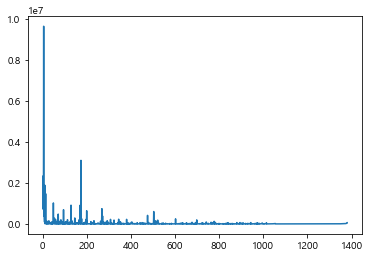

In [25]:
# 시리즈의 index가 x축, value가 y축
df['노출수'].plot()
plt.show()

- 명확한 패턴이 보일 수 있도록 데이터시각화 진행
 1. as-is : index를 기준으로 출력(그래프의 x축이 시리즈의 인덱스)
 2. <u>to-be : 정렬된 value를 기준으로 출력</u><br>
  2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬<br>
  2-2. 정렬된 데이터의 형태대로 index 재생성 후 시각화

In [26]:
imp_sort = df['노출수'].sort_values()
imp_sort = imp_sort.reset_index() # 인덱스 재생성
imp_sort

,index,노출수
0,1057,1001
1,445,1003
2,597,1005
3,983,1006
4,442,1007
...,...,...
1376,13,1470452
1377,9,1887822
1378,0,2319456
1379,173,3095998


In [27]:
# drop('', axis=1) - 삭제(열 기준)
imp_sort.drop('index', axis=1, inplace=True)
imp_sort

,노출수
0,1001
1,1003
2,1005
3,1006
4,1007
...,...
1376,1470452
1377,1887822
1378,2319456
1379,3095998


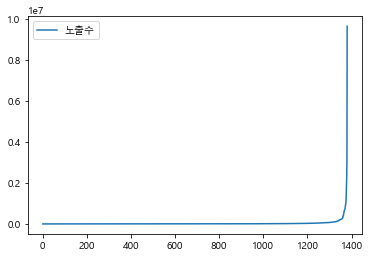

In [28]:
imp_sort.plot()
plt.show()

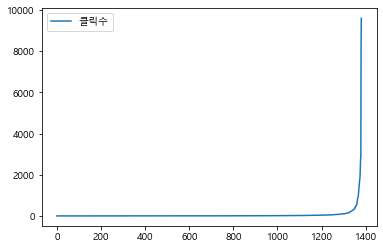

In [29]:
# 한줄 코딩
(((df['클릭수'].sort_values()).reset_index()).drop('index', axis=1)).plot()
plt.show()

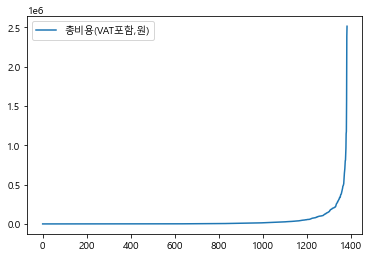

In [30]:
# 총비용 시각화
(((df['총비용(VAT포함,원)'].sort_values()).reset_index()).drop('index', axis=1)).plot()
plt.show()

## 중점관리키워드 추출
- 노출수, 클릭수 기준 상위 5%에 해당하는 키워드 추출 
 1. 95백분위수 찾기(quantile 함수 사용)
 2. 95백분위수 이상(상위 5%)의 노출수 추출
 3. 상위 5%에 해당하는 키워드 추출

In [31]:
imp = df['노출수']

In [32]:
print(imp.quantile())   # quantile - 분위수(default : 2분위수(중앙값))
print(imp.median())

3805.0
3805.0


In [33]:
print(imp.quantile(0))   # 최소값
print(imp.min())

1001.0
1001


In [34]:
print(imp.quantile(1))  # 최대값
print(imp.max())

9626374.0
9626374


In [35]:
# 95 백분위수 - 상위 5%
print(imp.quantile(0.95))

# 5 백분위수 - 하위 5%
print(imp.quantile(0.05))

82858.0
1122.0


In [36]:
# 상위 5% 노출수 추출
imp_top = imp[imp >= imp.quantile(0.95)]
imp_top

0      2319456
1       767491
2      1137840
3       694106
4      9626374
        ...   
698     196862
741      94933
763      82858
777     126393
780      90041
Name: 노출수, Length: 70, dtype: int64

In [37]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.41,262,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.05,296,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.03,4842,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.27,631,1175174
4,3. html,HTML,9626374,814,0.01,1408,1145903


In [38]:
# 데이터프레임의 인덱스를 키워드로 변경
df_index = df.set_index('키워드')
df_index

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
-,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,2319456,9606,0.41,262,2512444
-,올인원 패키지 : 업무자동화_VBA,767491,8058,1.05,296,2384965
일러스트,ㅍAOP 전체_중복키워드_디자인(삭제),1137840,324,0.03,4842,1568699
-,올인원 패키지 : 데이터 분석 입문 온라인_파콘,694106,1864,0.27,631,1175174
HTML,3. html,9626374,814,0.01,1408,1145903
...,...,...,...,...,...,...
엑셀셀서식,올인원 패키지 : 업무자동화_3. 엑셀,24016,0,0.00,0,0
MATCH,올인원 패키지 : 업무자동화_3. 엑셀,32287,0,0.00,0,0
LTV,마케팅KPI수립,32602,0,0.00,0,0


In [39]:
# 노출수 상위 5% 키워드 추출
imp = df_index['노출수'].sort_values(ascending=False)
imp_top = imp[imp >= imp.quantile(0.95)]
imp_top

키워드
HTML         9626374
바이럴마케팅       3095998
-            2319456
포토샵          1887822
엑셀           1470452
              ...   
OS             90041
-              88800
컴퓨터활용능력2급      88751
한글폰트           82983
프로모션           82858
Name: 노출수, Length: 70, dtype: int64

In [40]:
# 클릭수 상위 5% 키워드 추출
clk = df_index['클릭수'].sort_values(ascending=False)
clk_top = clk[clk >= clk.quantile(0.95)]
clk_top

키워드
-          9606
-          8058
가상화폐       2838
블록체인       2798
포토샵        2536
           ... 
스케치         133
프리미어프로      132
포토샵         130
재태크         126
주식투자하는법     120
Name: 클릭수, Length: 70, dtype: int32

### # 중점관리키워드 선별
 - 노출수와 클릭수 모두 상위 5% 이상

In [41]:
imp = df_index['노출수']
clk = df_index['클릭수']

result = df_index[(imp>=imp.quantile(0.95)) & (clk>=clk.quantile(0.95))]
result

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
-,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,2319456,9606,0.41,262,2512444
-,올인원 패키지 : 업무자동화_VBA,767491,8058,1.05,296,2384965
일러스트,ㅍAOP 전체_중복키워드_디자인(삭제),1137840,324,0.03,4842,1568699
-,올인원 패키지 : 데이터 분석 입문 온라인_파콘,694106,1864,0.27,631,1175174
HTML,3. html,9626374,814,0.01,1408,1145903
파이썬,6. 파이썬,384522,260,0.07,3705,964876
코딩,1. 코딩,562162,271,0.05,3243,879560
C언어,2. C언어 일반,271370,154,0.06,5269,809358
가상화폐,프로그래밍 전체_파워컨텐츠_블록체인(삭제),91369,2838,3.11,283,803770


In [42]:
# index - 중점관리키워드
result.index

Index(['-', '-', '일러스트', '-', 'HTML', '파이썬', '코딩', 'C언어', '가상화폐', '포토샵',
       '블록체인', '엑셀', '-', '포토샵', '컴퓨터활용능력', '컴퓨터활용능력2급', '컴퓨터활용능력1급', '포토샵',
       '-', '프리미어프로', '폰트', '스케치', '포토샵', '글씨체', '한글폰트', '마블', '바이럴마케팅'],
      dtype='object', name='키워드')

### # 저효율키워드 선별

- 노출수, 클릭수  기준 상위 5%의 키워드가 아닌데도 불구하고 비용이 많이 쓰이고 있는 키워드
 1. 노출수 95백분위수 미만
 2. 클릭수 95백분위수 미만
 3. 총비용 95백분위수 <b>이상</b>

In [43]:
cost = df_index['총비용(VAT포함,원)']

In [44]:
result = df_index[(imp<imp.quantile(0.95)) & (clk<clk.quantile(0.95)) & (cost>=cost.quantile(0.95))]
result

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
파이썬교육,올인원 패키지 : 업무자동화_2. 파이썬,1226,56,4.57,8831,498069
어플개발,1. 모바일앱개발_교육,8033,84,1.05,5428,455939
UIUX디자인,올인원 패키지 : UX/UI 디자인 입문_연관검색어,9627,119,1.24,3685,437767
앱개발,1. 모바일앱개발_교육,23962,103,0.43,3983,411092
어플제작,1. 모바일앱개발_교육,6496,79,1.22,5185,410652
앱제작,1. 모바일앱개발_교육,4324,79,1.83,4735,375023
자바스크립트,JavaScript BOOT CAMP,29305,59,0.20,5744,337766
게임학원,1. 일반_PC,6163,36,0.58,9363,337051
영상제작,ㅍAOP 전체_중복키워드_디자인(삭제),62542,49,0.08,6432,316448


# 광고그룹 분석

### as-is : 키워드  기준 분석
- 키워드의 노출수/클릭수/총비용...

### to-be : 광고그룹 기준 분석
- 데이터의 구성을 광고그룹 기준으로 변경해야함
- 광고그룹의 노출수/클릭수/총비용...
- groupby 함수 사용

In [45]:
grouped = df.groupby('광고그룹')

# 객체정보만 출력됨. 데이터를 살펴보기 위하여는 집계함수 사용해야 함
grouped

In [46]:
# count - 각 광고그룹별 데이터의 수
grouped.count()

,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,,
#000_마케팅 전체_main,48,48,48,48,48,48
001.BASIC DESIGN,9,9,9,9,9,9
001.데이터분석/ 통계,10,10,10,10,10,10
002.R,9,9,9,9,9,9
002.UX/UI,5,5,5,5,5,5
...,...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,13,13,13,13,13,13
프로그래밍 유치원,8,8,8,8,8,8
프로그래밍 전체,12,12,12,12,12,12


In [47]:
# mean - 각 광고그룹별 데이터의 평균
grouped.mean()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,14780.15,8.35,0.18,625.06,7243.96
001.BASIC DESIGN,5738.56,6.67,0.22,298.67,2427.33
001.데이터분석/ 통계,3715.00,20.20,0.89,1021.70,19575.60
002.R,13413.78,8.67,0.11,360.00,4796.00
002.UX/UI,3090.80,4.00,0.08,70.00,550.00
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,72092.69,16.77,0.05,648.38,15781.62
프로그래밍 유치원,5921.62,7.75,0.23,2032.50,23617.00
프로그래밍 전체,90375.00,9.17,0.02,123.92,1626.17


In [48]:
# median - 그룹 데이터의 중앙값
grouped.median()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,2765.00,4.00,0.06,766.00,2458.50
001.BASIC DESIGN,5524.00,2.00,0.03,358.00,1023.00
001.데이터분석/ 통계,1813.00,13.50,0.57,1097.00,13464.00
002.R,5184.00,4.00,0.03,119.00,1287.00
002.UX/UI,2649.00,1.00,0.08,73.00,88.00
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,5763.00,4.00,0.02,853.00,2706.00
프로그래밍 유치원,3748.00,3.00,0.11,1764.00,8002.50
프로그래밍 전체,3455.50,1.00,0.01,130.50,225.50


In [49]:
# std - 그룹 데이터의 표준편차
grouped.std()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,43495.11,17.70,0.32,472.81,15854.71
001.BASIC DESIGN,4182.62,9.10,0.46,176.19,3220.04
001.데이터분석/ 통계,4109.84,18.30,0.82,269.78,19127.40
002.R,19333.63,14.76,0.17,371.79,10077.59
002.UX/UI,1996.65,7.31,0.11,69.27,1005.28
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,188247.58,35.38,0.07,470.90,37543.64
프로그래밍 유치원,6642.34,9.87,0.26,1649.54,37088.92
프로그래밍 전체,200385.15,17.26,0.03,120.05,2801.70


# 광고그룹 기준 데이터 전처리

In [50]:
# 그룹별 합계(sum) - 노출수, 클릭수, 총비용
df_group = grouped.sum()
df_group

# 클릭률, 평균클릭비용 전처리 필요.
# to-be : 광고그룹에 대한 클릭률, 광고그룹에 대한 평균클릭비용

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,401,8.86,30003,347710
001.BASIC DESIGN,51647,60,2.02,2688,21846
001.데이터분석/ 통계,37150,202,8.88,10217,195756
002.R,120724,78,1.03,3240,43164
002.UX/UI,15454,20,0.42,350,2750
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,937205,218,0.69,8429,205161
프로그래밍 유치원,47373,62,1.84,16260,188936
프로그래밍 전체,1084500,110,0.26,1487,19514


In [51]:
# 클릭률(ctr) = 클릭수 / 노출수
df_group['클릭률(%)'] = df_group['클릭수']/df_group['노출수']

In [52]:
# 평균클릭비용(cpc) = 총비용 / 클릭수
df_group['평균클릭비용(VAT포함,원)'] = df_group['총비용(VAT포함,원)']/df_group['클릭수']

In [53]:
# 클릭수 칼럼 중 0인 데이터가 존재 => 평균클릭비용 칼럼 중 Nan 존재
df_group[df_group['클릭수']==0]

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
Hyperledger Fabric 프로젝트 CAMP,1990,0,0.00,nan,0
fin_camp_business_4,2136,0,0.00,nan,0
fin_camp_rfs_9,1928,0,0.00,nan,0
다함께 DDD 프로젝트,3689,0,0.00,nan,0
올인원 패키지 : 디지털 마케팅_인스타광고,1377,0,0.00,nan,0


In [54]:
# fillna - 결측값 대체
df_group['평균클릭비용(VAT포함,원)'] = df_group['평균클릭비용(VAT포함,원)'].fillna(0)

In [55]:
# 평균클릭비용 칼럼 반올림 처리, 소수점 제거
df_group['평균클릭비용(VAT포함,원)'] = round(df_group['평균클릭비용(VAT포함,원)'],0).astype(int)

In [56]:
df_group

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,401,0.00,867,347710
001.BASIC DESIGN,51647,60,0.00,364,21846
001.데이터분석/ 통계,37150,202,0.01,969,195756
002.R,120724,78,0.00,553,43164
002.UX/UI,15454,20,0.00,138,2750
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,937205,218,0.00,941,205161
프로그래밍 유치원,47373,62,0.00,3047,188936
프로그래밍 전체,1084500,110,0.00,177,19514


# 데이터 시각화 

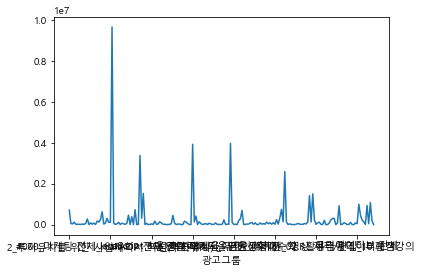

In [57]:
# 노출수
df_group['노출수'].plot()
plt.show()

- 명확한 패턴이 보일 수 있도록 데이터시각화 진행
 1. as-is : index를 기준으로 출력(그래프의 x축이 시리즈의 인덱스)
 2. <u>to-be : 정렬된 value를 기준으로 출력</u><br>
  2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬<br>
  2-2. 정렬된 데이터의 형태대로 index 재생성 후 시각화

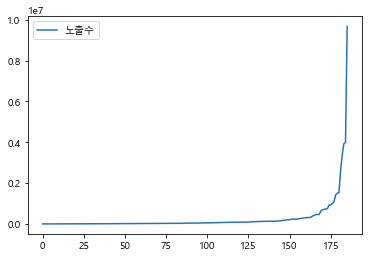

In [58]:
#노출수 선그래프
(((df_group['노출수'].sort_values()).reset_index()).drop('광고그룹',axis=1)).plot()
plt.show()

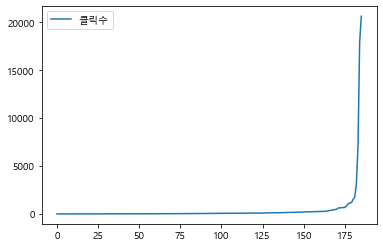

In [59]:
# 클릭수 선그래프
(((df_group['클릭수'].sort_values()).reset_index()).drop('광고그룹',axis=1)).plot()
plt.show()

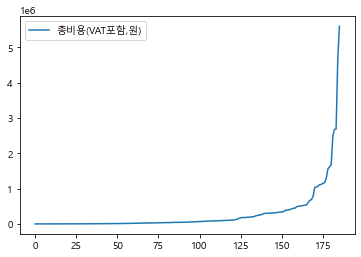

In [60]:
# 총비용 칼럼 선그래프
(((df_group['총비용(VAT포함,원)'].sort_values()).reset_index()).drop('광고그룹',axis=1)).plot()
plt.show()

### # 중점관리 광고그룹 / 저효율 광고그룹

- 중점관리 광고그룹
 1. 상위20%(노출수 80백분위수 이상)
 2. 상위10%(클릭수 90백분위수 이상)

In [61]:
imp = df_group['노출수']
clk = df_group['클릭수']

result = df_group[(imp>=imp.quantile(0.8)) & (clk>=clk.quantile(0.9))]
result.index

Index(['#000_마케팅 전체_main', '1. 코딩', '3. html', '6. 파이썬', 'AOP 전체_중복키워드_디자인',
       'AOP 전체_중복키워드_비지니스', 'ㅍAOP 전체_중복키워드_디자인(삭제)', '마케팅 전체',
       '올인원 패키지 : 데이터 분석 입문 온라인_파콘', '올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵',
       '올인원 패키지 : 업무자동화_VBA', '타이포그래피와 편집디자인', '프로그래밍 전체_파워컨텐츠_블록체인(삭제)'],
      dtype='object', name='광고그룹')

- 저효율 광고그룹 : 
 노출수, 클릭수  기준 상위의 키워드가 아닌데도 불구하고 비용이 많이 쓰이고 있는 광고그룹
 1. 노출수 80백분위수 미만
 2. 클릭수 90백분위수 미만
 3. 총비용 60백분위수 이상
 4. 총비용 90백분위수 미만

In [62]:
cost = df_group['총비용(VAT포함,원)']
result = df_group[(imp<imp.quantile(0.8)) & (clk<clk.quantile(0.9)) & (cost>=cost.quantile(0.6)) & (cost<cost.quantile(0.9))]
result.index

Index(['001.데이터분석/ 통계', '002.마케팅 입문', '003.퍼포먼스 마케팅', '1. 전체', '2. 프로그래밍',
       '5. 자료구조', 'AOP 전체_중복키워드_공통', 'AOP 전체_중복키워드_데이터사이언스',
       'AOP 전체_중복키워드_프로그래밍', 'JavaScript BOOT CAMP',
       'Python & Django를 활용한 웹 서비스_개발자', 'SEO/SEM 전략',
       'TensorFlow로 시작하는 딥러닝 입문', 'fin_camp_auction_6', 'ㅍAOP 전체_중복키워드_공통(삭제)',
       'ㅍAOP 전체_중복키워드_마케팅(삭제)', 'ㅍAOP 전체_중복키워드_프로그래밍(삭제)',
       'ㅍ올인원 패키지 : UX/UI 디자인 입문_연관검색어(삭제)', 'ㅍ올인원 패키지 : 브랜딩',
       '고객의 마음을 읽는 구글애널리틱스', '대기업을 이기는 브랜딩 전략', '마케터를 위한 데이터 부트캠프',
       '마케터를 위한 데이터 해석 실전', '마케팅 유치원', '마케팅KPI수립',
       '올인원 패키지 : 1인 쇼핑몰 시작하기_02.쇼핑몰구축', '올인원 패키지 : 1인 쇼핑몰_00.창업_MO',
       '올인원 패키지 : UX/UI 디자인 입문_연관검색어', '올인원 패키지 : 그로스해킹_5.마케팅 분석',
       '올인원 패키지 : 디지털 마케팅_1. 디지털 마케팅', '올인원 패키지 : 브랜딩',
       '올인원 패키지 : 업무자동화_1. 자동화', '올인원 패키지 : 업무자동화_4. VBA',
       '올인원 패키지 : 영상 제작/편집_9.유튜브/유튜버', '왕초보의 파이썬 웹 프로그래밍 CAMP',
       '코딩으로 여행하는 블록체인 서비스', '페이스북&인스타그램 마케팅 실전', '프로그래밍 유치원'],
      dtype='object', name='광고그룹')